In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load
city = pd.read_csv("data/city_data.csv")
ride = pd.read_csv("data/ride_data.csv")

# Dropping duplicated cities by keeping the first duplicates in the dataset
city_df = city.drop_duplicates('city', keep = 'first')

# Merging the two data sets on city
merged = city_df.merge(ride, on = 'city')

In [2]:
merged.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2/24/2018 8:40,13.93,5.628550e+12
1,Richardfort,38,Urban,2/13/2018 12:46,14.00,9.100500e+11
2,Richardfort,38,Urban,2/16/2018 13:52,17.92,8.206390e+11
3,Richardfort,38,Urban,2/1/2018 20:18,10.26,9.554940e+12
4,Richardfort,38,Urban,4/17/2018 2:26,23.00,7.200210e+11


## Bubble Plot of Ride Sharing Data

In [3]:
# Obtain the x and y coordinates for each of the three city types

# Build the scatter plots for each city types

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure


In [4]:
# Using groupby function to group the data by cities
city_grpby = merged.groupby('city')

In [5]:
# Total fares by cities
Average_Fares = city_grpby["fare"].mean()
Rides = city_grpby["ride_id"].count()
Total_Number_of_Drivers = city_grpby["driver_count"].mean()
Type_of_City = city_df.set_index('city')['type']

In [6]:
# Creating a dataframe including ride, fare, driver, and city types data
CityValues = pd.DataFrame({
    "Total Number of Rides": Rides,
    "Average Fares": Average_Fares,
    "Total Number of Drivers": Total_Number_of_Drivers,
    "City Types": Type_of_City
})

CityValues.sort_values("Total Number of Drivers", ascending = False).head()

,Total Number of Rides,Average Fares,Total Number of Drivers,City Types
West Samuelburgh,25,21.767600,73,Urban
South Michelleport,31,24.451613,72,Urban
West Anthony,30,24.736667,70,Urban
Liumouth,33,26.150000,69,Urban
Port Angela,19,23.836842,67,Urban


In [7]:
# Obtaining x and y coordinates for each city
rural = CityValues[CityValues["City Types"] == "Rural"]
suburban = CityValues[CityValues["City Types"] == "Suburban"]
urban = CityValues[CityValues["City Types"] == 'Urban']

In [8]:
color_scheme = {"Gold":"#FFD700", "Skyblue":"#87CEFF", "Coral":"#FF7F50"}
city_color = {"Urban": color_scheme["Gold"], "Suburban": color_scheme["Skyblue"], "Rural": color_scheme["Coral"]}

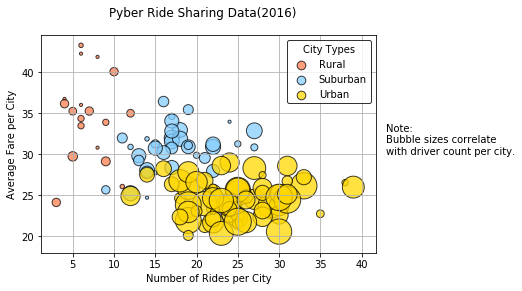

In [9]:
# Three scatter plots for each city type
plt.scatter(rural["Total Number of Rides"], rural["Average Fares"], s = rural["Total Number of Drivers"]*10, color = city_color["Rural"], edgecolor = "black", label = "Rural", alpha = 0.75)
plt.scatter(suburban["Total Number of Rides"], suburban["Average Fares"], s = suburban["Total Number of Drivers"]*10, color = city_color["Suburban"], edgecolor = "black", label = "Suburban", alpha = 0.75)
plt.scatter(urban["Total Number of Rides"], urban["Average Fares"], s = urban["Total Number of Drivers"]*10, color = city_color["Urban"], edgecolor = "black", label = "Urban", alpha = 0.75)

#print scatter plot
plt.suptitle("Pyber Ride Sharing Data(2016)")
plt.xlabel("Number of Rides per City")
plt.ylabel("Average Fare per City")

# Legend format
lgnd = plt.legend(frameon = True, edgecolor = "black", title= "City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]

plt.grid()
plt.text(43, 30, "Note:\nBubble sizes correlate\nwith driver count per city.")
plt.savefig("Images/Pyber Ride Sharing.png")
plt.show()

## Total Fares by City Type

In [10]:
# Calculate Type Percents

# Build Pie Chart

# Save Figure


In [11]:
city_type = merged.groupby(["type"])["fare"].sum()
city_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [12]:
labels = ["Rural", "Suburban", "Urban"]

In [13]:
colors = ["Gold", "Skyblue", "Coral"]

In [14]:
explode = (0, 0, 0.1)

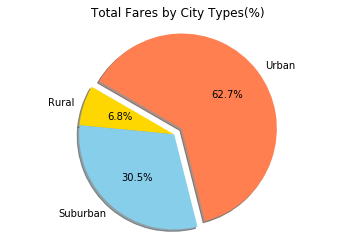

In [15]:
plt.title("Total Fares by City Types(%)")
plt.pie(city_type, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.axis('Equal')
plt.savefig("Images/Total Fares by City Types(%).png")
plt.show()

## Total Rides by City Type

In [16]:
# Calculate Ride Percents

# Build Pie Chart

# Save Figure


In [17]:
rides_by_city = merged.groupby(["type"])["ride_id"].count()
rides_by_city

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [18]:
labels = ["Rural", "Suburban", "Urban"]

In [19]:
colors = ["Gold", "Skyblue", "Coral"]

In [20]:
explode = (0, 0, 0.1)

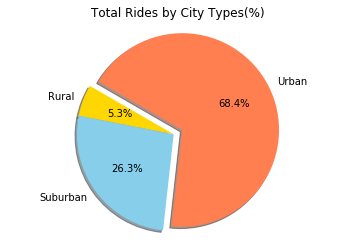

In [21]:
plt.title("Total Rides by City Types(%)")
plt.pie(rides_by_city, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.axis('Equal')
plt.savefig("Images/Total Rides by City Types(%).png")
plt.show()

## Total Drivers by City Type

In [22]:
# Calculate Driver Percents

# Build Pie Charts

# Save Figure


In [23]:
drivers_by_city = city.groupby(["type"])["driver_count"].sum()
drivers_by_city

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [24]:
labels = ["Rural", "Suburban", "Urban"]

In [25]:
colors = ["Gold", "Skyblue", "Coral"]

In [26]:
explode = (0, 0, 0.1)

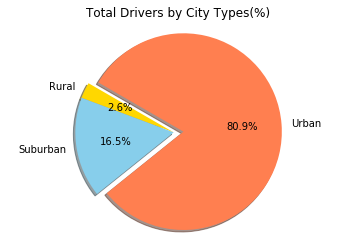

In [27]:
plt.title("Total Drivers by City Types(%)")
plt.pie(drivers_by_city, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.axis('Equal')
plt.savefig("Images/Total Drivers by City Types(%).png")
plt.show()

#THREE TRENDS BASED ON THE DATA:
    
#THREE OBSERVABLE TRENDS BASED ON THE DATA
#1-	The bubble scattered plot chart indicated there are positive correlation between the average fare per city and the number of rides per city as it is expected. Again, since the average population in cities are the highest in urban areas and lowest in rural areas it is expected average fare and rides per city types is the highest in urban agglomerates while it is minimum in rural areas compared to the remaining two city types. 

#2-	Although we does not have a temporal data regarding the average fares, total number of rides, and the total number of drivers by city types, it is quite expected that the cities growing towards the suburban areas, combining by fast urbanization, counter urbanization  and increasing  number of new residential areas in suburbs, it is always profitable to invest in suburban areas to start a new drive share business or to expand the existing ones.

#3-	The pie chart analyses substantially support the item two. Although most of the drivers (81%) found in urban areas, they realize 68% of total rides and produce 62.7% of the total fares. On the contrary, although the suburban drivers constitute 16.5% of the total drivers, they realize 26.3% of the total rides. Moreover, suburban drivers produce more than 30% of the total fares although they make up only 16.5% of the total drivers.

